## Testing Connectivity

Here we explore how different paddings of the MEG recordings affect the phase after applying the Hilbert transform.

Start Matlab session:

In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-48c7880e-8c96-4e6f-933b-7f755877a622
Send 'exit' command to kill the server
......MATLAB started and connected!


/usr/local/lib/python2.7/dist-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
%%matlab

addpath /home/dragos/src/fieldtrip-20160526
addpath /home/dragos/Projects/SummerProject
ft_defaults

Plot something with Matlab:

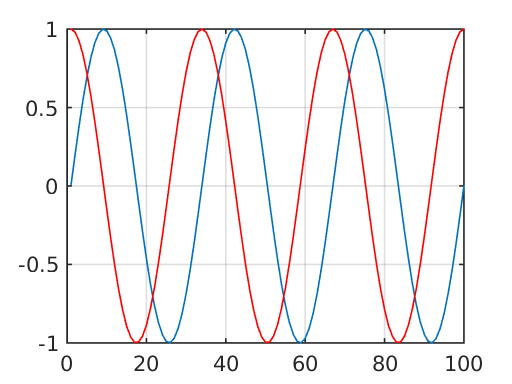

In [3]:
%%matlab 
%%%%%%%%%%%%
%%% Plot Test to check that Matlab is loaded properly
%%%%%%%%%%%%

a = linspace(0.01,6*pi,100);
plot(sin(a))
grid on
hold on
plot(cos(a),'r')

## First Part (Hilbert for a random signal)

#### Hilbert Transform 

Here we look at how padding affects the phase when taking the Hilbert transform. This code is from Javier for a simple signal.

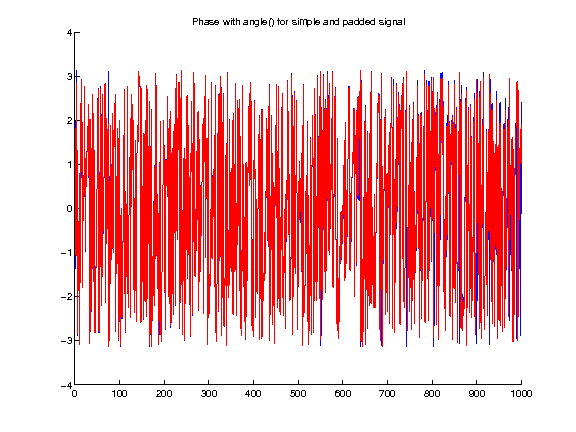

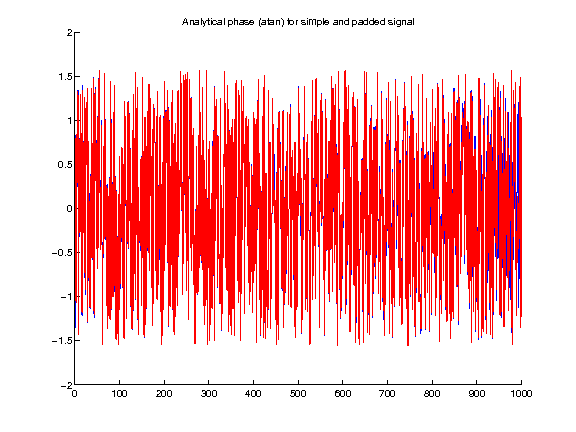

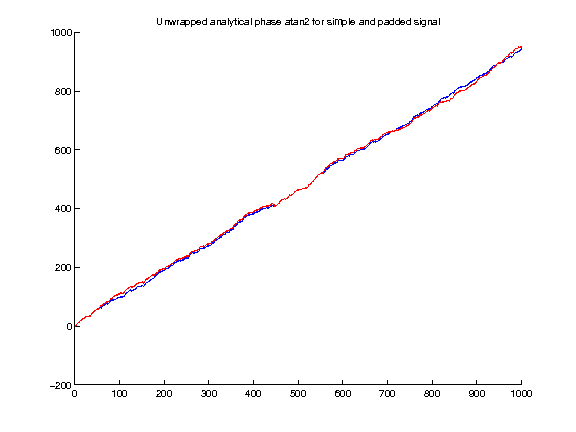

In [7]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Checks if padding a signal makes a difference when taking the
%%% Hilbert transform to find the phase.
%%%
%%% code from Javier (email, 3/07/2014) %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

signal = randn(1000,1);

hsig = hilbert(signal);

%% padding with the first and last values; ideally we would like to keep the trend too, 
%% but this is just a quick example
signalPadded = [repmat(signal(1),100,1);signal;repmat(signal(end),100,1)];
hsigpad = hilbert(signalPadded); 

%% the code above does something like this: for "signal" --> "ssssssssignallllllllll"
    
%plot(angle(signal)) % meaningless because this is not the instantaneous phase
hold on
title('Phase with angle() for simple and padded signal')
plot(angle(hsig),'b') %% this is the phase :)
plot(angle(hsigpad(101:end-100)),'r') %% the phase of the central part of the padded signal

%%%  Get analytical phase (as per http://www.scholarpedia.org/article/Hilbert_transform_for_brain_waves)

%% plot phase from atan for the initial signal and the padded one
%figure; hold on;
phase = atan(imag(hsig)./signal);
phasepad = atan(imag(hsigpad(101:end-100))./signalPadded(101:end-100));
%plot(unwrap(phase), 'b')
%plot(unwrap(phasepad), 'r')

figure; hold on;
title('Analytical phase (atan) for simple and padded signal');
plot(phase, 'b')
plot(phasepad, 'r')

figure; hold on;
title('Unwrapped analytical phase atan2 for simple and padded signal');
plot(unwrap(atan2(imag(hsig), signal)), 'b')
plot(unwrap(atan2(imag(hsigpad(101:end-100)), signalPadded(101:end-100))), 'r')
%% these do the same as the two lines above
%plot(unwrap(angle(hsig)), 'b')
%plot(unwrap(angle(hsigpad(101:end-100))), 'r')

Apparently for a complex number _z_:

_angle(z)_ - is equal to _theta = atan2(imag(z),real(z))_. Quick check below and comparison to _unwrapped_ phase:

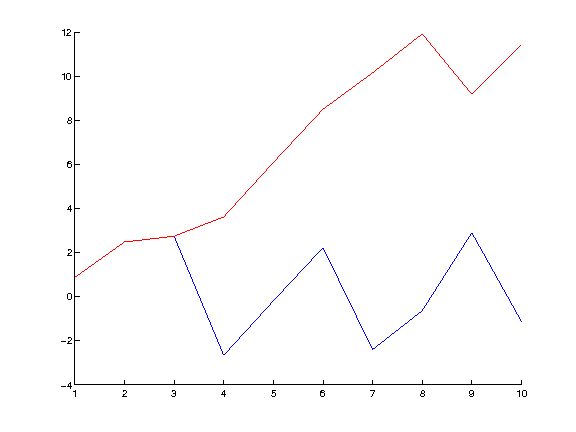

In [8]:
%%matlab
signal = randn(10,1);
hilbert(signal);
%phase = atan(signal./imag(hilbert(signal)))
phase = atan2(imag(hilbert(signal)), signal);
x = imag(hilbert(signal));
hold on

% the first 2 below are exactly the same, so they are indeed the same
plot(angle(hilbert(signal)), 'g')
plot(phase, 'b')
plot(unwrap(phase), 'r')


## Second Part (Hilbert for padded/unpadded MEG)

Looking at how padding affects the phase of cleaned MEG signals when taking the Hilbert transform:

In [9]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Loads cleaned MEG epoch.
%%% Padds the signal with 200 columns at the beginning with the first column of the epoch 
%%%     and 200 columns at the end with the last column of the epoch. 
%%% Computes Hilbert transform of unpadded and padded signals.
%%%
%%% OBS: In this cell, the code takes the Hilbert transform of 
%%%   the "channels (rows) X time samples (columns)" matrix
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%% add data folder to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');

epoch = load('MEGnoECG_07_segm9.mat');
signal = epoch.meg_no_ecg;
% size(signal) %% this is 148 (channels) x 1695 (samples)

%%% subtract mean before doing anything else?

%% plot the MEG signals
%plot(signal)

hsignal = hilbert(signal);

%% pad signal
signalPadded = [repmat(signal(:,1),1,200) signal repmat(signal(:,end),1,200)];

% size(signalPadded) %% this is 148 x 1895 --> correct as we padded with 200 columns in total
%signalPadded(:,98:102) %% extra check --> OK
%signalPadded(:, 1793:1799) %% extra check --> OK

hsignalPadded = hilbert(signalPadded);

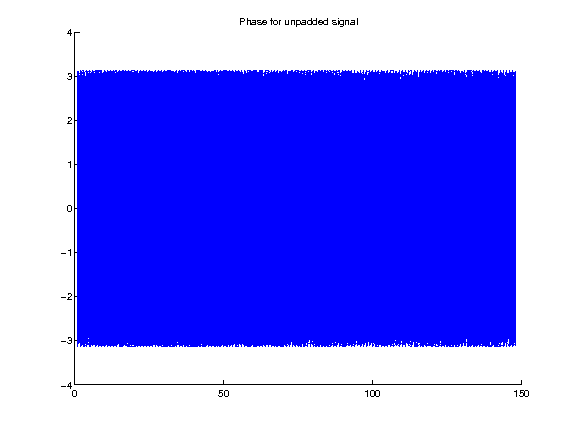

In [10]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Plots the phase for the unpadded MEG signal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

figure; hold on;
title('Phase for unpadded signal')
plot(angle(hsignal),'b')

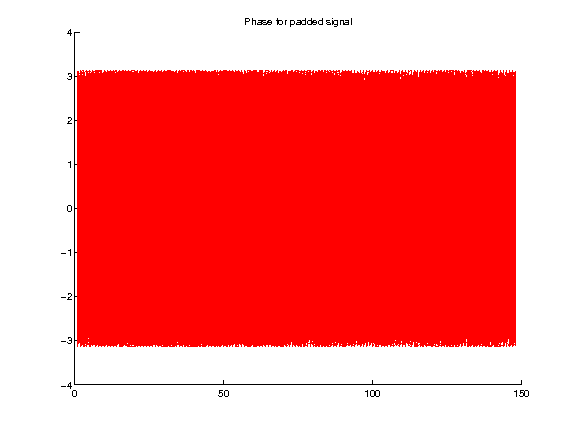

In [11]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Plots the phase for the padded MEG signal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

figure; hold on;
title('Phase for padded signal')
%plot(angle(hsignalPadded(:,201:end-200)),'r')
plot(angle(hsignalPadded),'r')

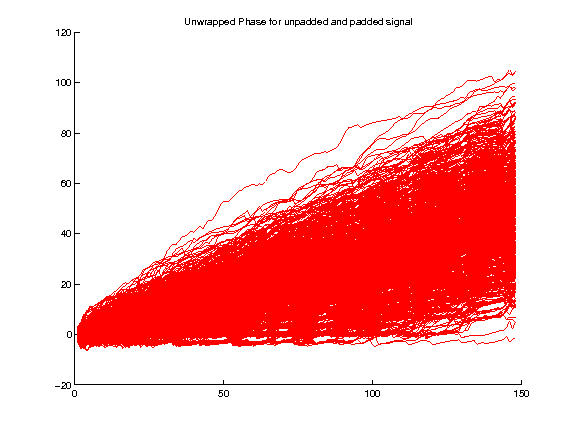

In [12]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Plots the unwrapped phase for the unpadded and padded signal
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

figure; hold on;
title('Unwrapped Phase for unpadded and padded signal')
plot(unwrap(angle(hsignal)),'b')
%% these two lines below generate the same thing w.r.t the plot above??
plot(unwrap(angle(hsignalPadded(:,201:end-200))),'r')
%plot(unwrap(angle(hsignalPadded)),'r')

## Third Part (Hilbert for padded/unpadded MEG)

Here we take the Hilbert transform of the transposed MEG matrix which yields a _time samples x channels_ matrix. In Matlab, the _hilbert()_ function operates columnwise. I guess this is the correct way to compute the phase.

Padding is done by:
- appending 200 columns identical to the first column of the epoch at the beginning of the signal
- appending 200 columns identical to the last column of the epoch at the end of the signal

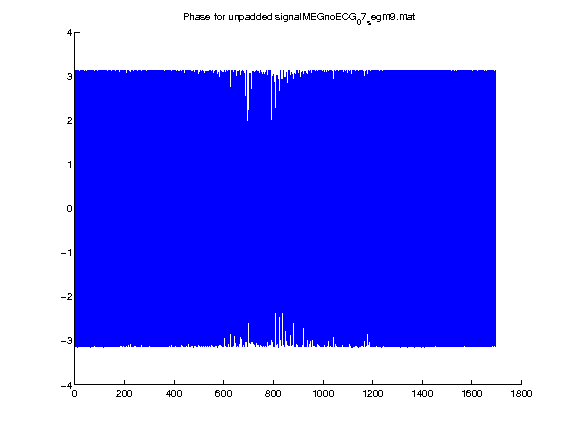

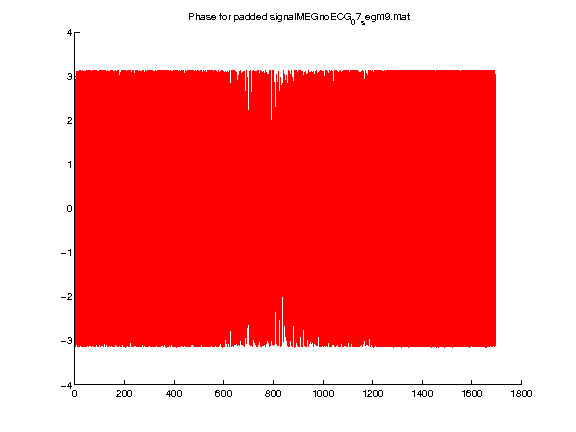

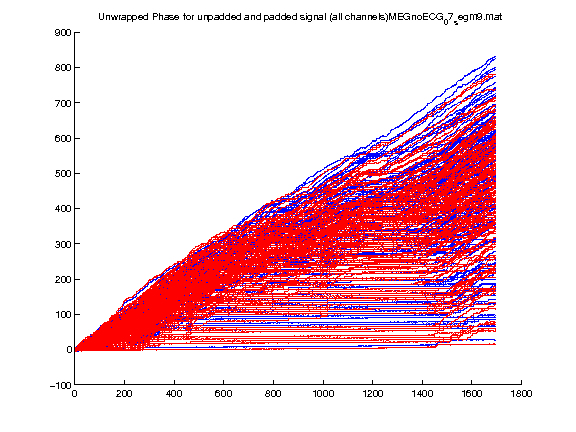

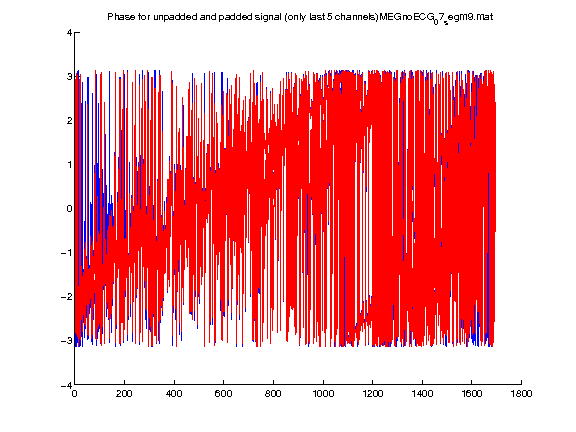

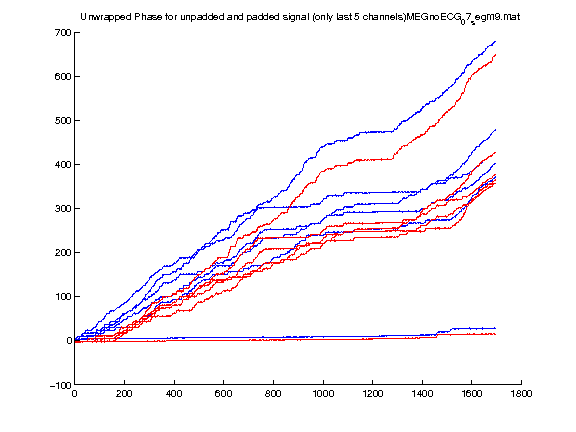

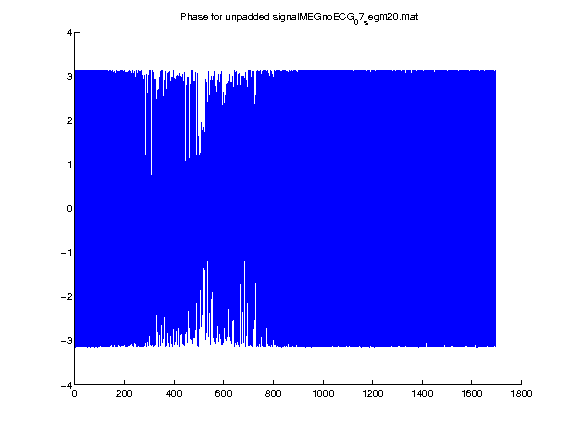

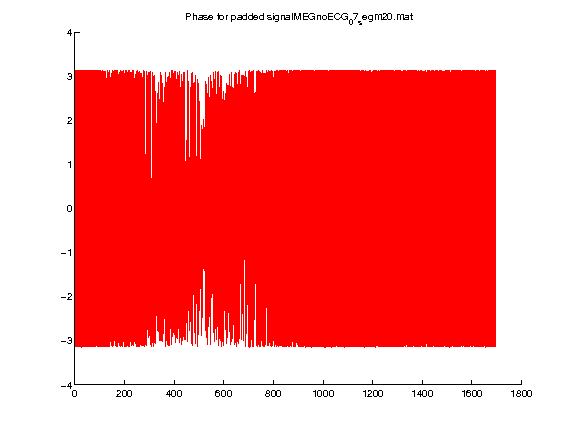

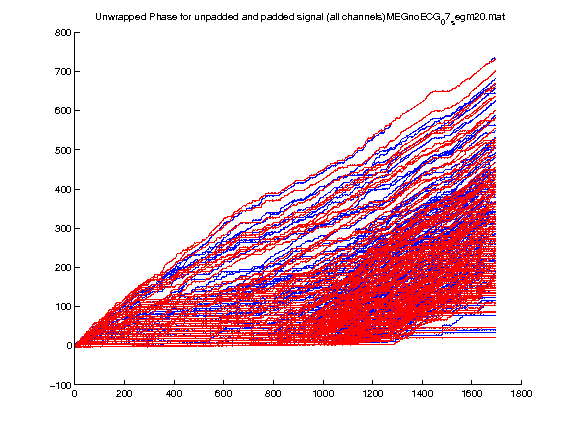

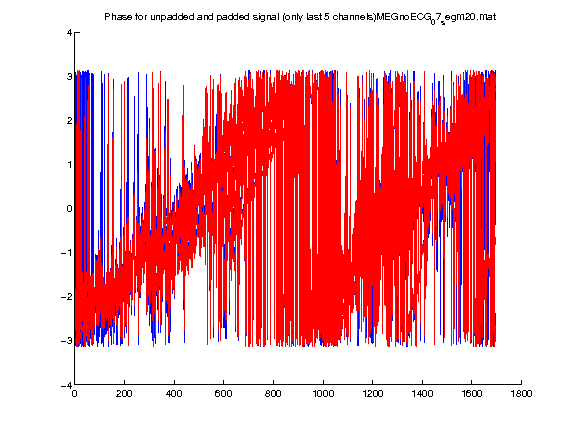

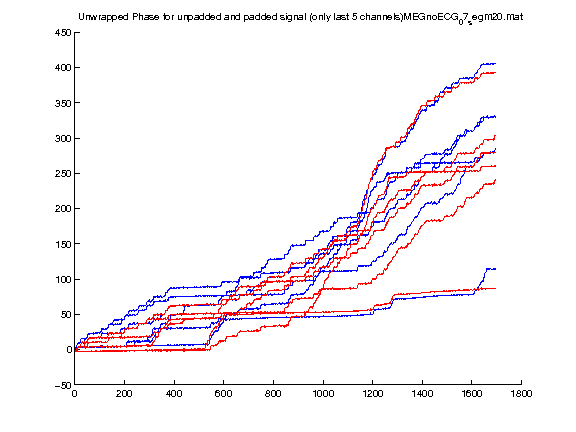

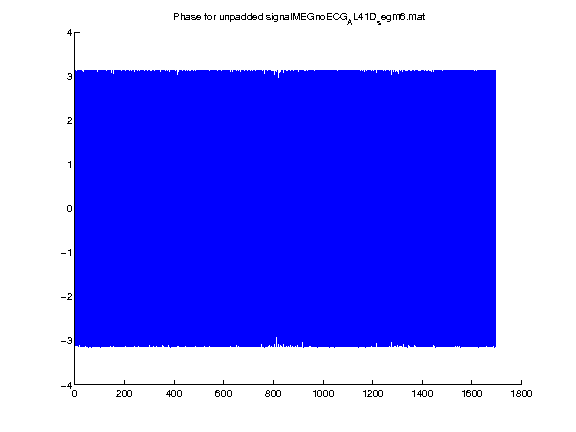

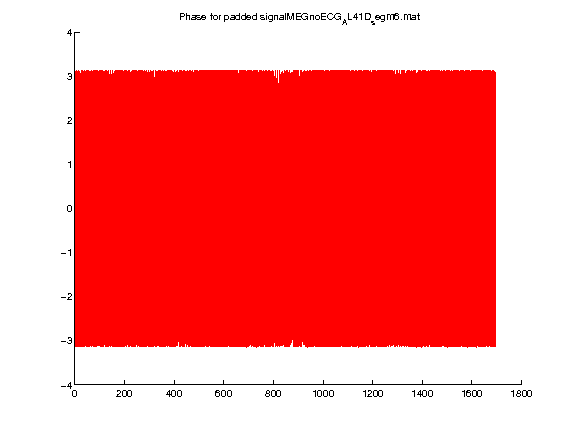

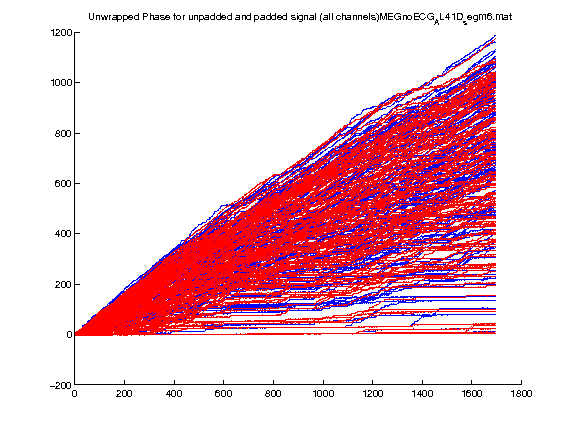

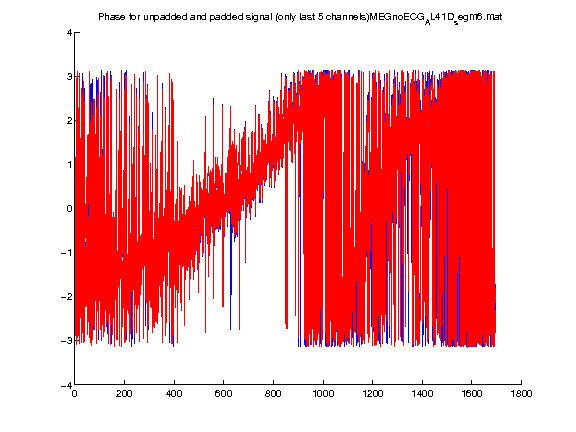

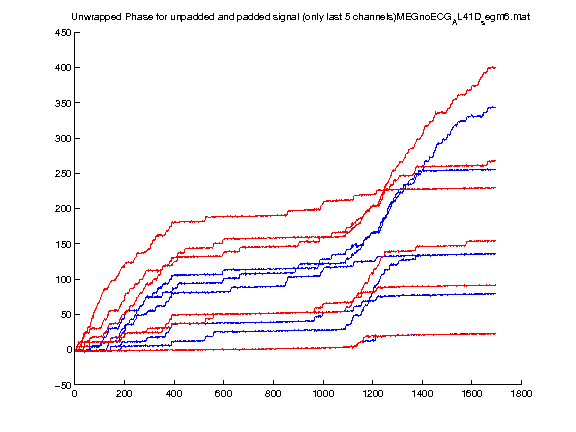

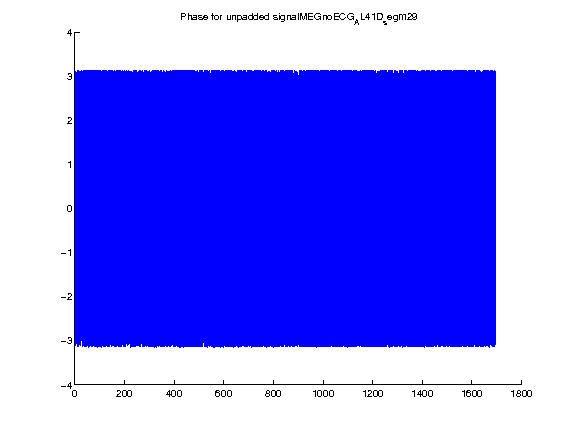

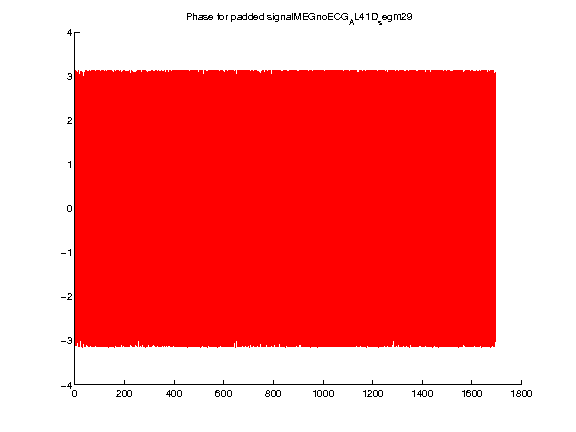

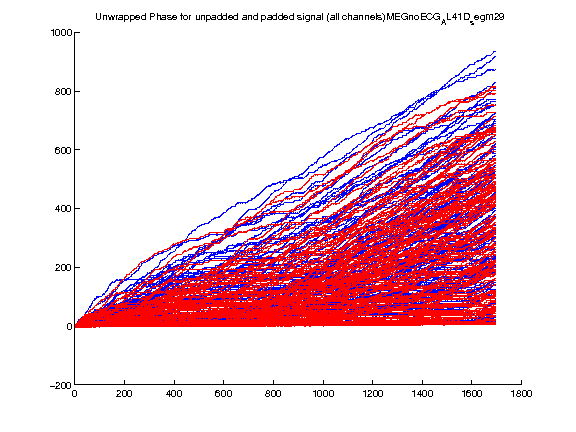

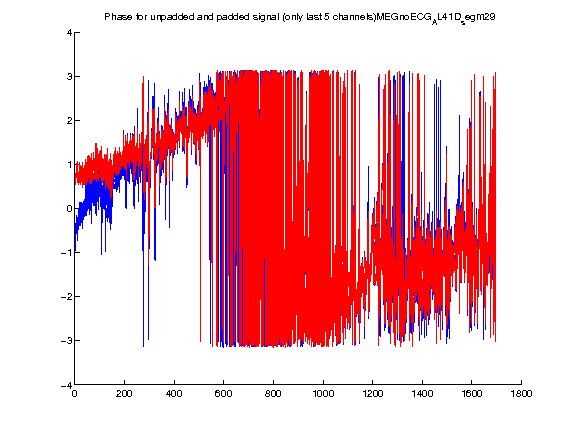

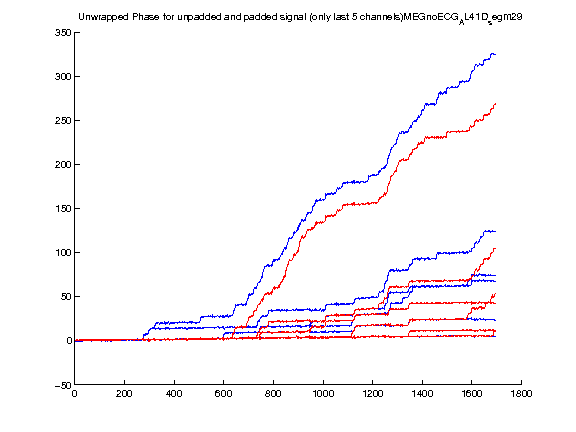

In [13]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Load MEG signals for epochs specified in the "data" array.
%%% Computes Hilbert transform of unpadded and padded version.
%%% Plots the previous graphs.
%%%
%%% OBS: Code takes Hilbert transform of 
%%%  the "time samples (rows) X channels (columns)" matrix (using transpose()).
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%% add data folders to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/AL41D');

data = {'MEGnoECG_07_segm9.mat', ... 
        'MEGnoECG_07_segm20.mat', ...
        'MEGnoECG_AL41D_segm6.mat', ...
        'MEGnoECG_AL41D_segm29'};

for i=1:length(data)
    epoch = load( data{i} );
    signal = epoch.meg_no_ecg;
    hsignal = hilbert( transpose(signal) );

    %% pad signal (200 columns at beginning and end) and take Hilbert
    signalPadded = [repmat(signal(:,1),1,200) signal repmat(signal(:,end),1,200)];
    hsignalPadded = hilbert( transpose(signalPadded) );
    
    figure; hold on;
    title(strcat('Phase for unpadded signal ', data{i}))
    plot(angle(hsignal), 'b')

    figure; hold on;
    title(strcat('Phase for padded signal', data{i}))
    plot(angle(hsignalPadded(201:end-200,:)),'r') %% need to get rid of rows as I've transposed

    figure; hold on;
    title(strcat('Unwrapped Phase for unpadded and padded signal (all channels) ', data{i}))
    plot(unwrap(angle(hsignal)),'b')
    plot(unwrap(angle(hsignalPadded(201:end-200, :))),'r')

    figure; hold on;
    title(strcat('Phase for unpadded and padded signal (only last 5 channels)', data{i}))
    plot(angle(hsignal(:, end-5:end)),'b')
    plot(angle(hsignalPadded(201:end-200, end-5:end)),'r')
    
    figure; hold on;
    title(strcat('Unwrapped Phase for unpadded and padded signal (only last 5 channels)', data{i}))
    plot(unwrap(angle(hsignal(:, end-5:end))),'b')
    plot(unwrap(angle(hsignalPadded(201:end-200, end-5:end))),'r')   
end

## Fourth Part

Here we also compare the phases of unpadded and padded signal as in Part Three, with the difference that the padding is done using _symmetric extension_ (also called _reflective padding_ in the past). Padding is done using [wextend()](http://www.mathworks.co.uk/help/wavelet/ref/wextend.html).

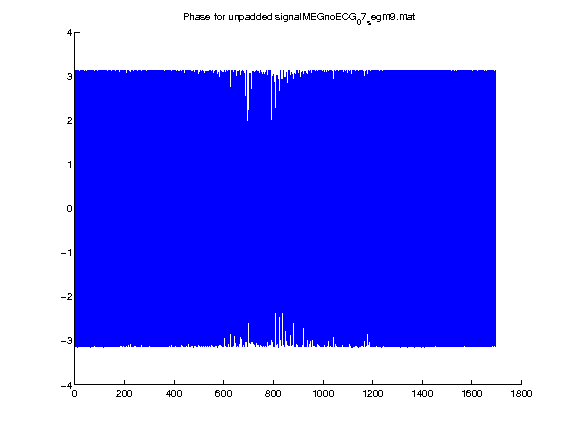

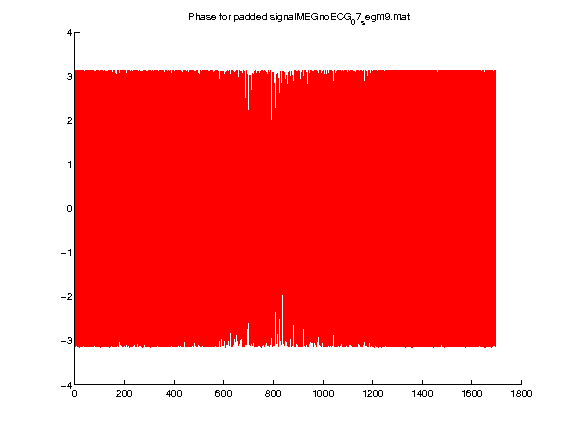

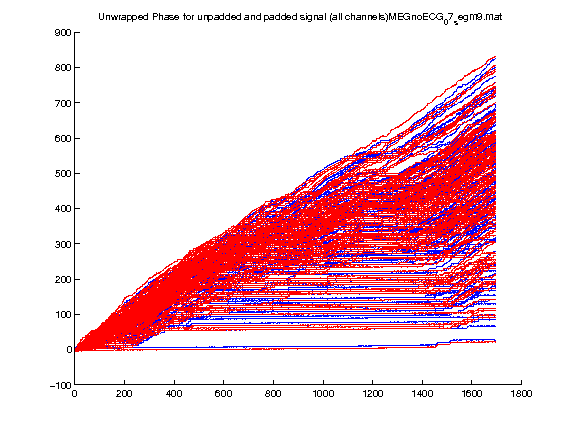

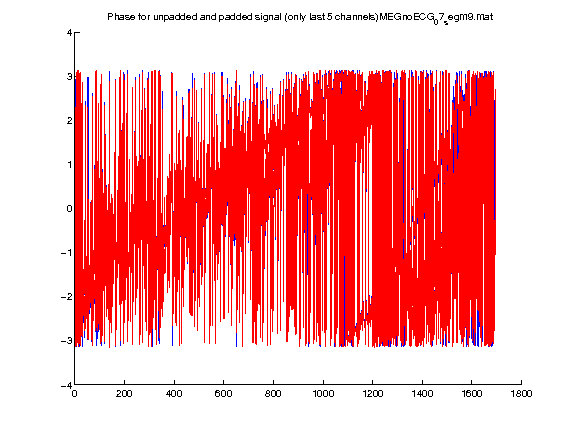

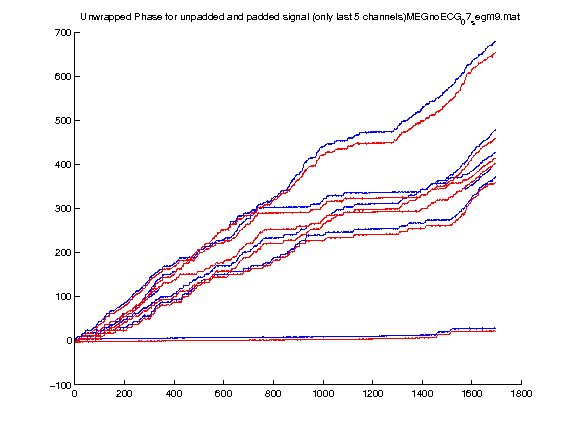

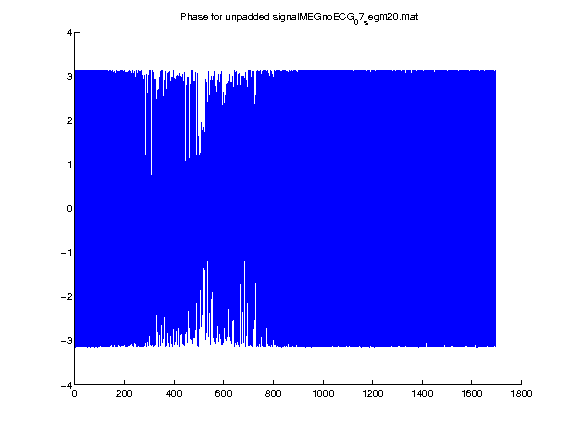

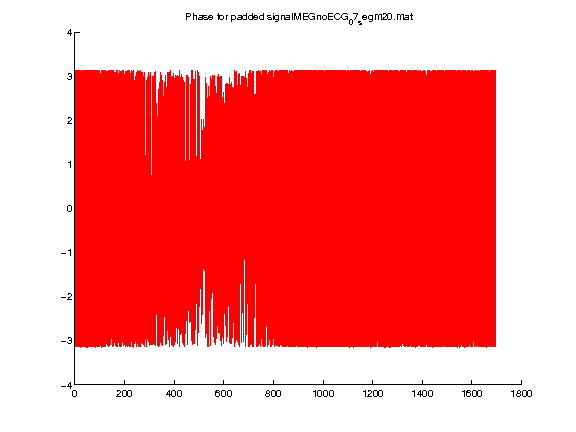

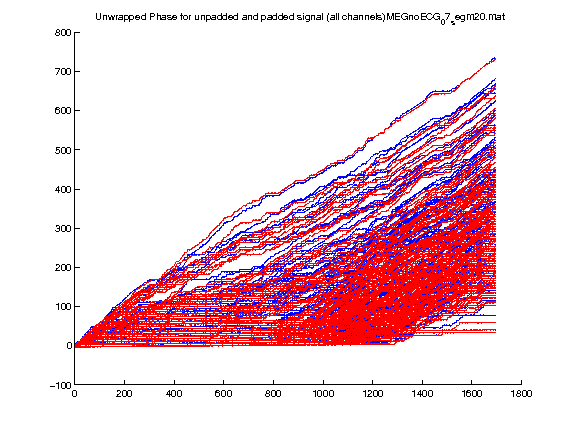

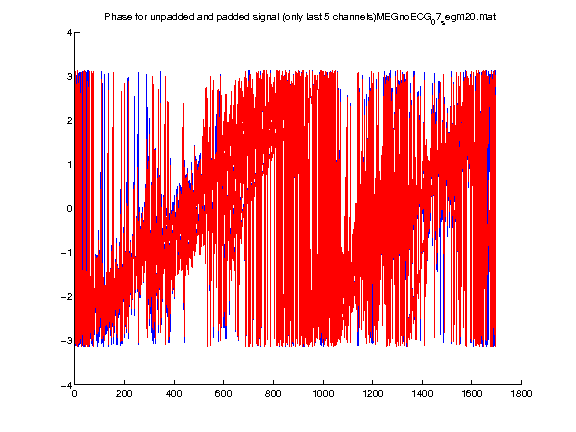

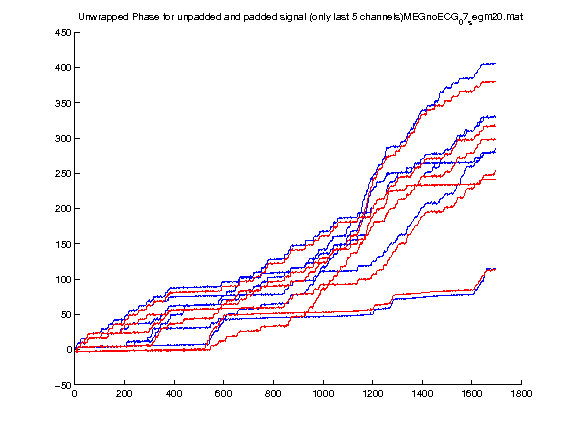

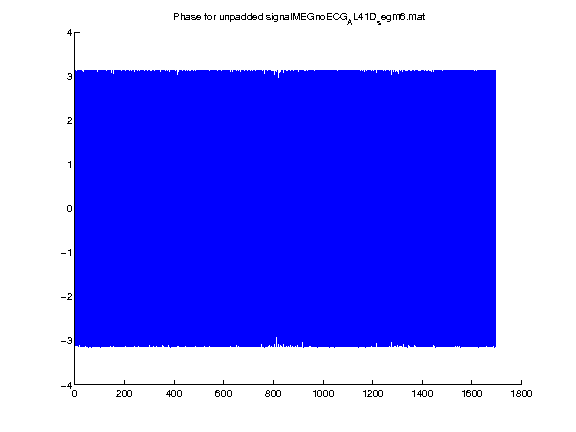

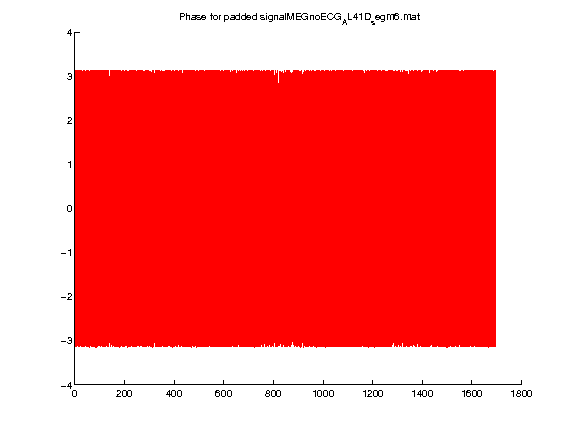

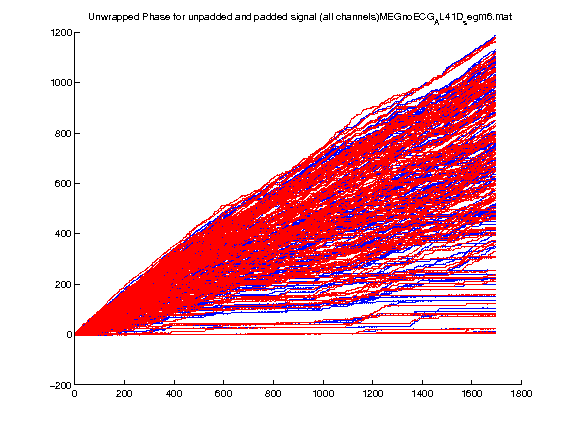

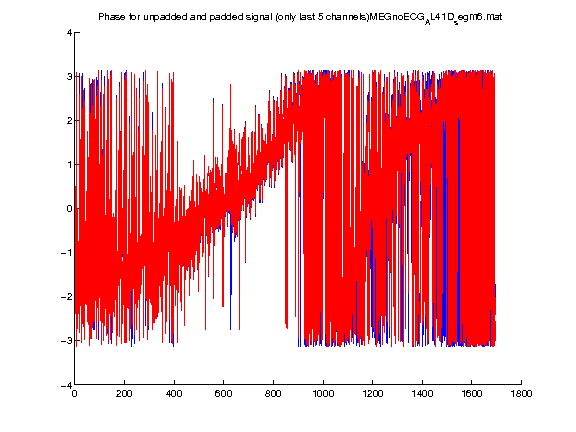

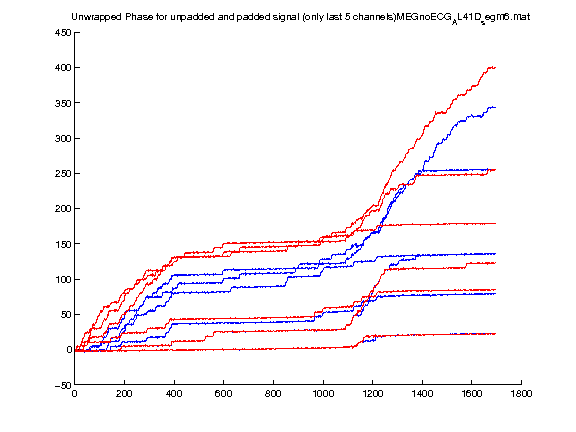

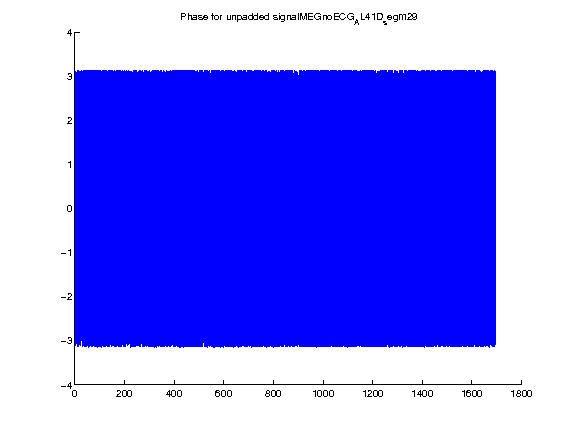

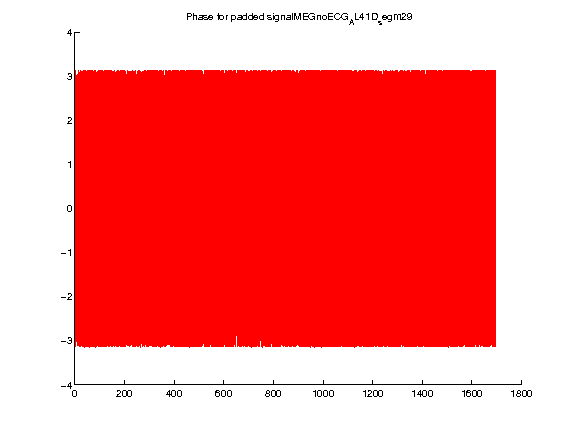

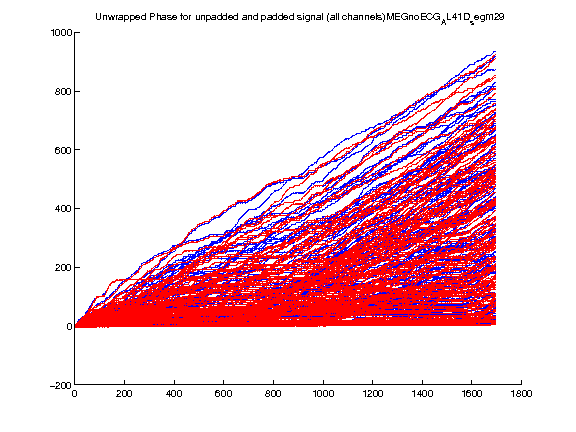

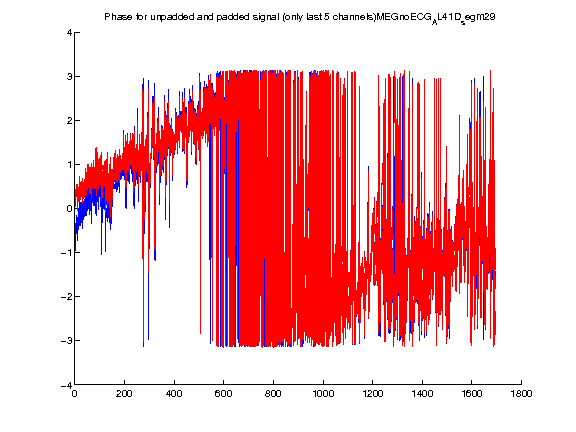

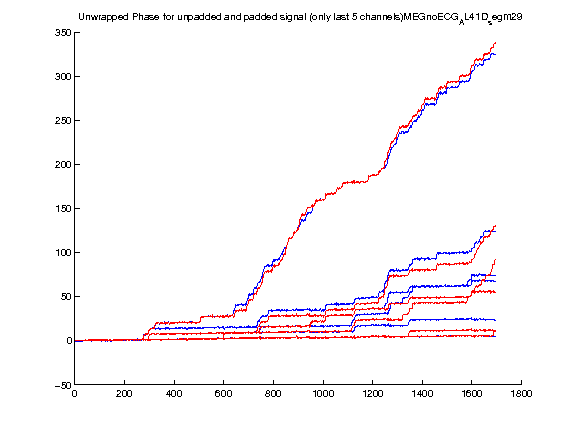

In [14]:
%%matlab
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%% Load MEG signals for epochs specified in the "data" array.
%%% Computes Hilbert transform of unpadded and padded version.
%%%     Padding is done using symmetric extension.
%%% Plots the previous graphs.
%%%
%%% OBS: Code takes Hilbert transform of 
%%%  the "time samples (rows) X channels (columns)" matrix (using transpose()).
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%% add data folders to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/AL41D');

data = {'MEGnoECG_07_segm9.mat', ... 
        'MEGnoECG_07_segm20.mat', ...
        'MEGnoECG_AL41D_segm6.mat', ...
        'MEGnoECG_AL41D_segm29'};

for i=1:length(data)
    epoch = load( data{i} );
    signal = epoch.meg_no_ecg;
    hsignal = hilbert( transpose(signal) );

    %% pad signal symmetrically (200 columns at beginning and end) and take Hilbert
    L = [0, 200]; %% add 0 rows, 200 columns (on each side)
    %% wextend(TYPE,MODE,X,L,LOC)    
    signalPadded = wextend('2D', 'sym', signal, L);  %% symmetric pading
    
    %size(signalPadded) % OK!
         
    hsignalPadded = hilbert( transpose(signalPadded) );
    
    figure; hold on;
    title(strcat('Phase for unpadded signal ', data{i}))
    plot(angle(hsignal), 'b')

    figure; hold on;
    title(strcat('Phase for padded signal', data{i}))
    plot(angle(hsignalPadded(201:end-200,:)),'r') %% need to get rid of rows as I've transposed

    figure; hold on;
    title(strcat('Unwrapped Phase for unpadded and padded signal (all channels) ', data{i}))
    plot(unwrap(angle(hsignal)),'b')
    plot(unwrap(angle(hsignalPadded(201:end-200, :))),'r')

    figure; hold on;
    title(strcat('Phase for unpadded and padded signal (only last 5 channels)', data{i}))
    plot(angle(hsignal(:, end-5:end)),'b')
    plot(angle(hsignalPadded(201:end-200, end-5:end)),'r')
    
    figure; hold on;
    title(strcat('Unwrapped Phase for unpadded and padded signal (only last 5 channels)', data{i}))
    plot(unwrap(angle(hsignal(:, end-5:end))),'b')
    plot(unwrap(angle(hsignalPadded(201:end-200, end-5:end))),'r')   
end

## Fifth Part (Hilbert on padded/unpadded filtered MEG)

This section looks at estimating instantaneous phase with FieldTrip.

We filter the our data and then apply the Hilbert transform. This can be done in _ft_preprocessing()_ like so:

preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 3 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 0 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 0 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 0 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 0 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the additional allocation of an estimated 0 MB
preprocessing
preprocessing trial 1 from 1
the call to "ft_preprocessing" took 0 seconds and required the 

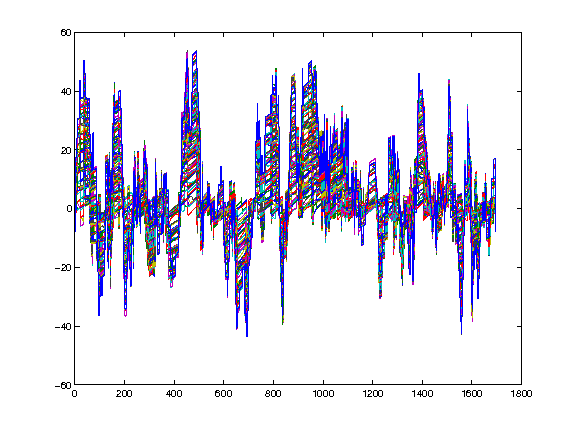

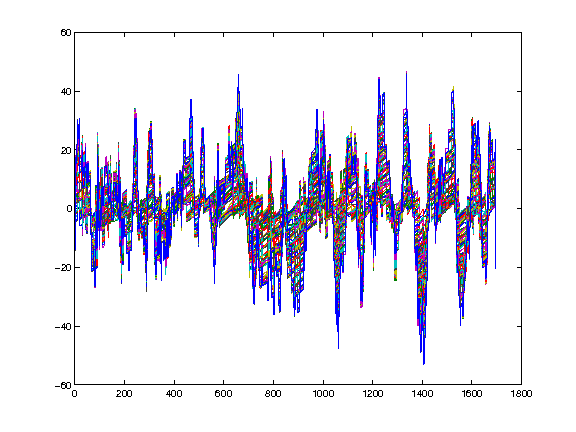

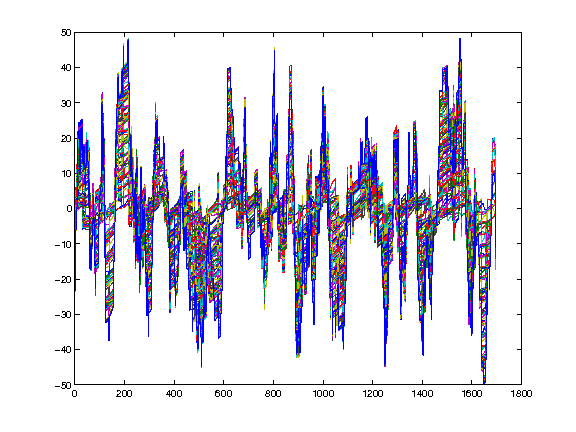

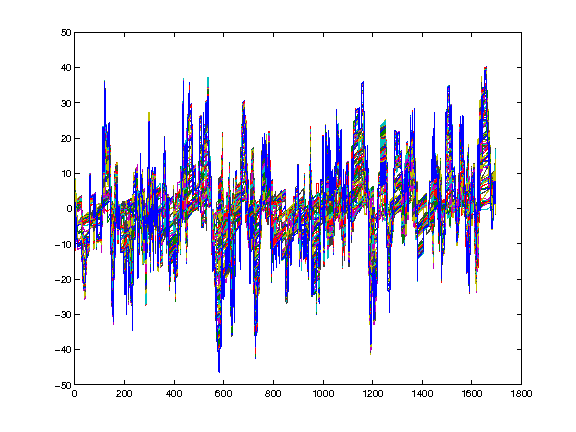

In [18]:
%%matlab

% load header file
load('/home/dragos/DTC/MSc/SummerProject/4D_header_adapted.mat');

filterOrder = 750;
Fs = 169.54;

%% add data folders to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/07');
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/MEG_50863_noECG_10s/AL41D');

megFiles = {'MEGnoECG_07_segm9.mat', ... 
        'MEGnoECG_07_segm20.mat', ...
        'MEGnoECG_AL41D_segm6.mat', ...
        'MEGnoECG_AL41D_segm29'};


for i=1:length(megFiles)
    epoch = load( megFiles{i} );
    
    % configuration structure
    cfg = []; 
    cfg.channel = header.label; %% channels that will be read and/or preprocessed 
    cfg.bpfilter = 'yes'; %% bandpass filter
    cfg.bpfreq = [0.5 4]; %% bandpass frequency range as [low high] in Hz (delta here)
    cfg.bpfiltord = filterOrder; %% bandpass filter order 
    cfg.bpfilttype = 'fir'; %% band pass filter type - FIR
    cfg.bpfiltdir = 'twopass'; %% filter direction - two pass, like filtfilt
    cfg.demean = 'yes'; %% apply baseline correction (remove DC offset)
    
    cfg.hilbert = 'angle'; % this gives you just the phase, you can
                            %specify 'complex' to get both phase and amplitude
        
    % data structure
    data = [];
    data.label = header.label; 
    data.fsample = Fs;
    data.trial = {epoch.meg_no_ecg};
    
    load('/home/dragos/DTC/MSc/SummerProject/src/timeVectorFor10s.mat');
    data.time = {timeFor10s'};
    startsample = 1;
    endsample = size(epoch.meg_no_ecg, 2);
    data.sampleinfo = [startsample endsample];
    
    [processedData] = ft_preprocessing(cfg, data);
    
    %cfg.padding = 
    cfg.padtype = 'mirror';
    [processedDataWithPadding] = ft_preprocessing(cfg, data);
    figure; 
    plot(1:1695,unwrap(processedData.trial{1}));
    
end


Looking at how padding affects the phase of _RAW_ MEG signals when taking the Hilbert transform. Have to merge raw data first...

In [19]:
%%matlab

%% add RAW data folder to path
addpath('/home/dragos/DTC/MSc/SummerProject/data/MEG_AD_Thesis/50863')

In [21]:
%unload_ext pymatbridge

MATLAB closed
